2.0 Image Classification with Keras

References:

> Practical Deep Learning for Cloud, Mobile, and Edge

> * https://www.practicaldeeplearning.ai

> * https://github.com/PracticalDL/Practical-Deep-Learning-Book/tree/master/code

> * https://www.oreilly.com/library/view/practical-deep-learning/9781492034858/

> Keras

> * https://keras.io

> Matplotlib

> * https://matplotlib.org

> Numpy

> * https://numpy.org

> Pillow

> * https://pillow.readthedocs.io/en/stable/index.html

> Tensorflow

> * https://www.tensorflow.org

IDE

> Google Colab

> * https://colab.research.google.com/

We can drag and drop data files (images) that we want to work with from our local drive into the google colab file icon (left side of the colab screen).

> This process will require reloading the image each time we access the workbook/notebook

> Here is the url where we gank the cat image from

> * https://github.com/PracticalDL/Practical-Deep-Learning-Book/tree/master/sample-images

> Our google colab temporary image filepath is

> * content/cat.jpg



Let's look at a script that will classify an image using transfer learning

> Recall that ResNet-50 is a pretrained convolutional neural network that is 50 layers deep

> * Technically, 48 convolutional layers, one MaxPool layer, and one average pool layer

> * We are piggybacking on this model to classify the image (tell us what the image is of) aka using transfer learning

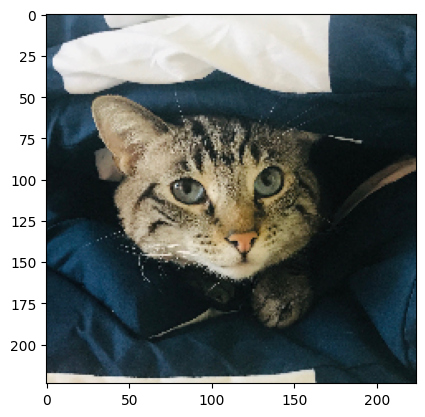

1/1 [==============================] - 1s 1s/step

 this is probably an image of a  [('n02123045', 'tabby', 0.5681728), ('n02124075', 'Egyptian_cat', 0.22223161), ('n02123159', 'tiger_cat', 0.06103408)]


In [16]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

IMG_PATH = 'cat.jpg' # drag and drop the image you want to work with into the google colab temp folder on the left side of your screen

img = image.load_img(IMG_PATH, target_size=(224, 224))
plt.imshow(img)
plt.show()

model = tf.keras.applications.resnet50.ResNet50()

def predict(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    model = tf.keras.applications.resnet50.ResNet50()
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    prediction = model.predict(img_preprocessed)
    print('\n this is probably an image of a ', decode_predictions(prediction, top=3)[0])

predict(IMG_PATH)

Let's take a look at the code line by line

This line imports the tensorflow library

> https://www.tensorflow.org

In [ ]:
import tensorflow as tf

This line imports the resnet50 keras module and associated functions

> tf.keras.applications.resnet50

> * https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50

> tf.keras.applications.resnet50.ResNet50()

> * https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50

> decode_predictions()

> * https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/decode_predictions

> preprocess_input()

> * https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input

> Recall that ResNet-50 is a pretrained convolutional neural network that is 50 layers deep

> * Technically, 48 convolutional layers, one MaxPool layer, and one average pool layer

> * We are piggybacking on this model aka using transfer learning

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

This line imports the tensorflow keras preprocessing module and the image module along with it's associated classes and functions

> Module: tf.keras.preprocessing

> * https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing#functions

> * https://keras.io/guides/preprocessing_layers/

> Module: tf.keras.preprocessing.image

> * https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image

In [ ]:
from tensorflow.keras.preprocessing import image

This line imports the numpy library

> https://numpy.org

In [ ]:
import numpy as np

This line imports the matplotlib library

> https://matplotlib.org

In [ ]:
import matplotlib.pyplot as plt

This line loads an image into PIL format

> * https://www.tensorflow.org/api_docs/python/tf/keras/utils/load_img

> * https://keras.io/api/data_loading/image/

> * https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html

In [ ]:
img = image.load_img(IMG_PATH, target_size=(224, 224))

This line uses matplotlib to display data as an image, i.e., on a 2D regular raster

> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

In [ ]:
plt.imshow(img)

This line uses matplotlib to display all open figures

> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

In [ ]:
plt.show()

This line instantiates the ResNet50 architecture

> https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50

In [ ]:
model = tf.keras.applications.resnet50.ResNet50()

This function does all the heavy lifting (coordinating & synchronizing)

> loads the image

> resizes the image to 224 x 224 pixels

> normalizes (feature scaling) the pixels

> transfer learning - aka downloads the ResNet50 model and caches locally for use

> provides probability predictions for each image class

In [ ]:
def predict(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    model = tf.keras.applications.resnet50.ResNet50()
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    prediction = model.predict(img_preprocessed)
    print(decode_predictions(prediction, top=3)[0])

This line runs the function on our image (cat photo)

In [ ]:
predict(IMG_PATH)